<a href="https://colab.research.google.com/github/SESCDS/sescds/blob/master/Part%202/Lesson%201/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 1. Знакомство с fastai

Убедитесь, что у вас подключен GPU: *Runtime -> Change runtime type -> Hardware accelerator*

Импортируем библиотеку

In [0]:
from fastai import *
from fastai.vision import *

Воспользуемся одним из подготовленных датасетов - он содержит несколько тысяч фотографий собак и кошек. Функция *untar_data* скачает датасет по ссылке *URLs.DOGS* и положит его в папку *dest*. При этом вернет объект *PosixPath* - это как обычный путь к файлу, но универсальный для разных операционных систем и обладающий разными полезными методами.

In [3]:
data_path = untar_data(URLs.DOGS, dest = '/content/datasets/dogscats')
data_path

PosixPath('/content/datasets/dogscats')

Структура данных следующая:



```
data_path\
          train\
              class1\
              class2\
          ...
          valid\
              class1\
              class2\
```


     

Убедимся в этом с помощью метода *ls()*

In [0]:
data_path.ls()

[PosixPath('/content/datasets/dogscats/train'),
 PosixPath('/content/datasets/dogscats/sample'),
 PosixPath('/content/datasets/dogscats/valid'),
 PosixPath('/content/datasets/dogscats/test1'),
 PosixPath('/content/datasets/dogscats/models')]

In [0]:
(data_path/'train').ls()

[PosixPath('/content/datasets/dogscats/train/dogs'),
 PosixPath('/content/datasets/dogscats/train/cats')]

Теперь, когда данные скачаны, подготовим их для подачи в модель. Если структура папки с картинками такая, как в нашем примере, это делается с помощью одной функции:

In [0]:
data = ImageDataBunch.from_folder(data_path, size=224, bs=32).normalize(imagenet_stats)

Мы указываем путь к данным и размер, к которому будут приведены файлы. Что такое *normalize(imagenet_stats)* мы узнаем позже - пока просто всегда применяйте этот метод.

Теперь посмотрим на фото:

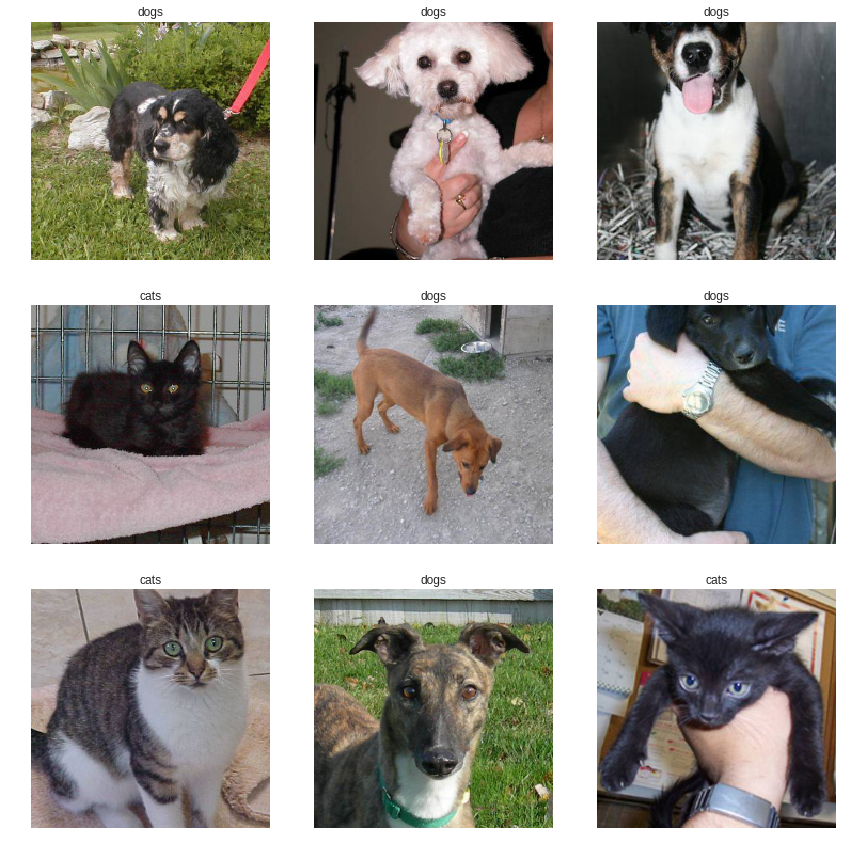

In [0]:
data.show_batch(rows=3)

Данные готовы, пора создать модель. Это тоже делается очень просто:

In [0]:
learn = create_cnn(data, models.resnet34, metrics=[accuracy])

Здесь мы указываем, на каких данных учимся, *архитектуру* нейронной сети, и какие метрики будем использовать при валидации.
Что такое архтиектура? Вот:

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

Здесь выведена вся последовательность *слоёв* модели resnet34. Каждый из них мы разберем на следующих занятиях.

Теперь мы можем начать обучение

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,0.053189,0.027779,0.991000
2,0.033143,0.022997,0.991000


За 9 минут мы получаем классификатор, который распознает кошек и собак с точностью > 99%. Попробуем еще улучшить результат:

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


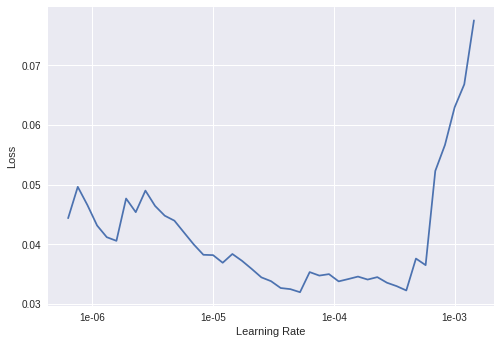

In [0]:
learn.recorder.plot()

До этого большая часть слоев модели была *заморожена* - позднее мы подробнее разберем, что это значит. Теперь мы их *разморозили* и продолжаем обучение с меньшим *learning rate* , или *шагом*

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.031141,0.019196,0.993500
2,0.012414,0.018037,0.993500


Посмотрим на результа:

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

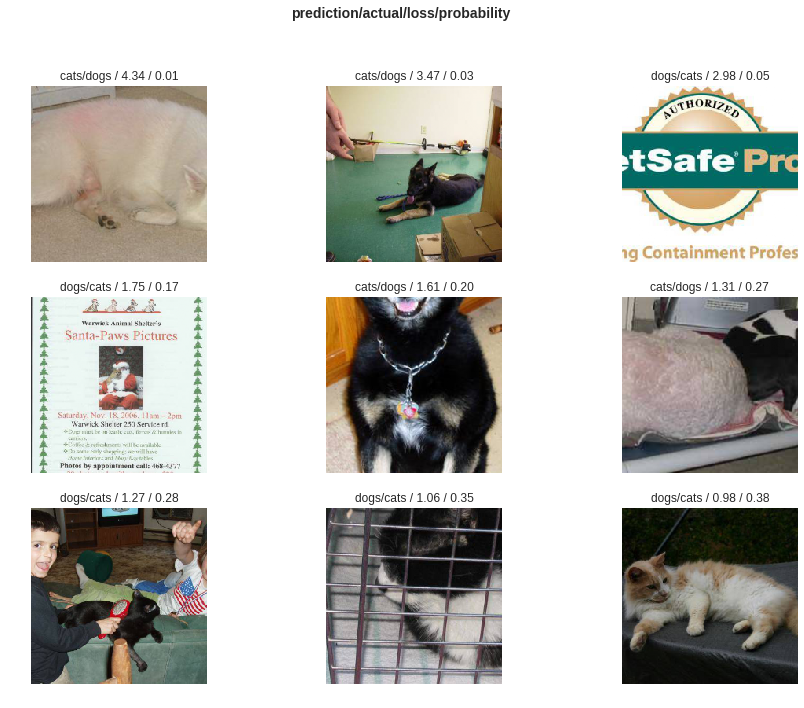

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

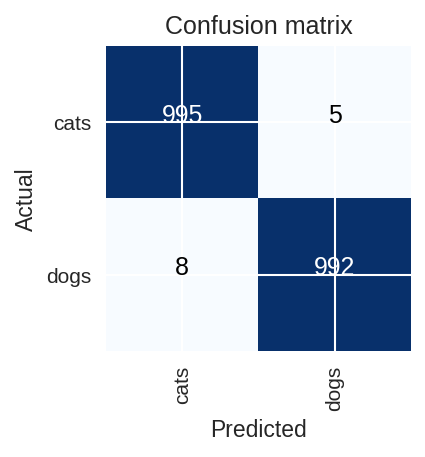

In [0]:
interp.plot_confusion_matrix(figsize=(3,3))

# Домашнее задание: соберите свой датасет и обучите классификатор

Легче всего будет использовать гугл диск. Подключить его можно следующими командами:

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Вам потребуюется перейти по ссылке и подтвердить аккаунт. Содержимое диска будет выглядеть примерно так:

In [0]:
!ls '/content/gdrive/My Drive'

'Colab Notebooks'
'DL course'
 fastai
 HTMP79.zip
 IMG_1345.MOV
 India.pptx
 LBM
 Matlab
 mobilenet_v2.pth.tar
'Party Invite.gform'
 PRB0140.zip
'PRB0140.zip (Unzipped Files)'
 test
 test2
 test3
'Моисеев Томск 2016'
'Перечень публикаций-докладов и др к ПРНД_1.3-2014_Моисеев.doc'
 проекция.xlsx
'Тезисы Моисеев.doc'
 ТЕКСТ.docx


Для легкого сбора картинок можете использовать расширение для Chrome - *Download all Images*. Делаетe поиск в Google, запускаете расширение, ждете полосу загрузки, сохраняете. Копируете файлы на Google диск.

In [0]:
gdrive_path = Path('/content/gdrive/My Drive/fastai/lesson1_hw/')

In [0]:
gdrive_path.ls()

[PosixPath('/content/gdrive/My Drive/fastai/lesson1_hw/train')]

In [0]:
data = ImageDataBunch.from_folder(gdrive_path, valid_pct = 0.2, size=224).normalize(imagenet_stats)

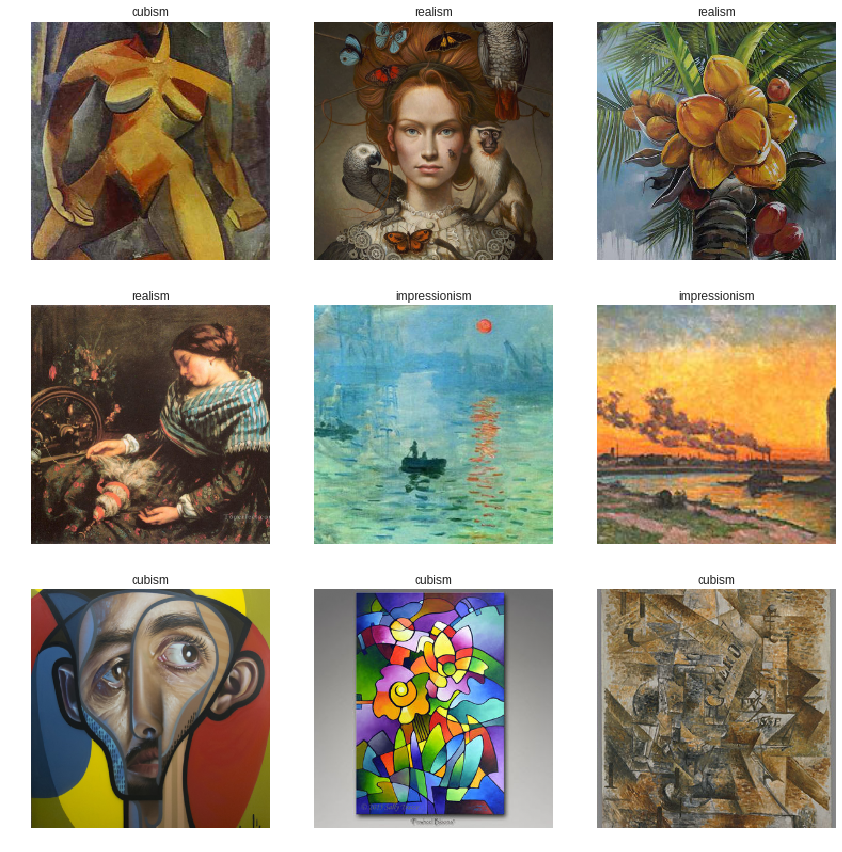

In [0]:
data.show_batch(3)

Попробуйте использовать models.resnet50 вместо models.resnet34